In [ ]:
# loading "cifar-10" and partitioning the loaded data to train and test
from keras.datasets import cifar10
(x_trn , y_trn) , (x_tst , y_tst) = cifar10.load_data()

In [ ]:
# calling needed libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import NearestCentroid
from tensorflow import keras 
from tensorflow.keras.layers import  Conv2D, Dense,Input, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization

In [ ]:
print(x_trn.shape)
print(x_tst.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


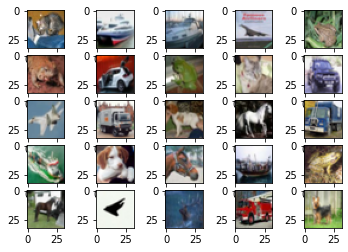

In [ ]:
#exhibit some example pictures
figure, pic = plt.subplots(5,5)
count = 0
for i in range(5):
    for j in range(5):
        pic[i][j].imshow(x_test[count])
        count += 1
plt.show()

In [ ]:
#defining the vector for lablels
l = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
#cosidering the evaluation by the variable "evn"
(x_trn,x_evn) = x_trn[5000:],x_trn[:5000]
(y_trn,y_evn) = y_trn[5000:],y_trn[:5000]
print(x_evn.shape)
print(y_evn.shape)
print(x_trn.shape)
print(y_trn.shape)

(5000, 32, 32, 3)
(5000, 1)
(45000, 32, 32, 3)
(45000, 1)


In [ ]:
#evaluate the number of features
y_trn, y_tst = y_trn.flatten(), y_tst.flatten()
a = len(set(y_trn))
print("labels:", a)

labels: 10


Epoch 1/10
1563/1563 [==============================] - 68s 43ms/step - loss: 3.8923 - accuracy: 0.4105 - val_loss: 1.4239 - val_accuracy: 0.5012
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.2943 - accuracy: 0.5471 - val_loss: 1.3558 - val_accuracy: 0.5339
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.1849 - accuracy: 0.5874 - val_loss: 1.3052 - val_accuracy: 0.5513
Epoch 4/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.1303 - accuracy: 0.6034 - val_loss: 1.3000 - val_accuracy: 0.5615
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0794 - accuracy: 0.6218 - val_loss: 1.3358 - val_accuracy: 0.5586
Epoch 6/10
1563/1563 [==============================] - 74s 48ms/step - loss: 1.0031 - accuracy: 0.6482 - val_loss: 1.3155 - val_accuracy: 0.5570
Epoch 7/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.9512 - accuracy: 0.6670 - val_loss: 1.3138 -

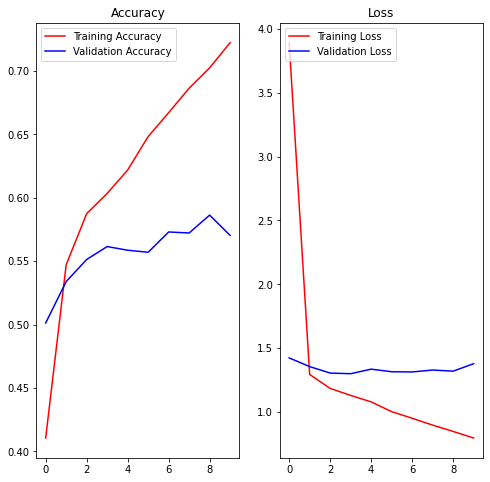

In [ ]:
#define the neural network with 3 hidden layers 
(trn_pics, trn_labels), (tst_pics, tst_labels) = tf.keras.datasets.cifar10.load_data()
input_shape = trn_pics.shape[1:]
model  = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=input_shape)) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
#3 Hlayers with activation function type "relu" and "softmax"
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# compiling the model
model.compile(optimizer = tf.keras.optimizers.Adam() , loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ["accuracy"])

# picking number of epochs
#epochs = 5
epochs = 10
history  =  model.fit(trn_pics, trn_labels,batch_size = 32,validation_data = (tst_pics, tst_labels),epochs = epochs)

# considering all the possibilities select activation func = 256
plt.figure(figsize = (8,8))

plt.subplot(1,2,1)
plt.plot(range(epochs) , history.history["accuracy"] , "r" , label = "Training Accuracy")
plt.plot(range(epochs) , history.history["val_accuracy"] , "b" , label = "Validation Accuracy")
plt.legend(loc="upper left")
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(range(epochs) , history.history["loss"] , "r" , label = "Training Loss")
plt.plot(range(epochs) , history.history["val_loss"] , "b" , label = "Validation Loss")
plt.legend(loc="upper left")
plt.title("Loss")

plt.show()


313/313 [==============================] - 5s 15ms/step


313/313 [==============================] - 4s 12ms/step
confusion matrix=
 [[660  59  47  36  12   8   6   7  97  68]
 [ 28 785   4  14   2   7   4   3  32 121]
 [ 97  32 408  79 110 105  67  36  36  30]
 [ 43  30  75 411  70 195  63  33  34  46]
 [ 36  17  99 121 478 100  57  56  17  19]
 [ 20  22  67 201  70 484  26  51  34  25]
 [ 14  33  59 105  96  55 591   3  15  29]
 [ 25  30  35  98  86 114  11 530  13  58]
 [122  78   8  21   4  10   4   2 703  48]
 [ 41 206   8  20   4  14   6  12  36 653]]
              precision    recall  f1-score   support

           0       0.61      0.66      0.63      1000
           1       0.61      0.79      0.68      1000
           2       0.50      0.41      0.45      1000
           3       0.37      0.41      0.39      1000
           4       0.51      0.48      0.49      1000
           5       0.44      0.48      0.46      1000
           6       0.71      0.59      0.64      1000
           7       0.72      0.53      0.61      1000
       

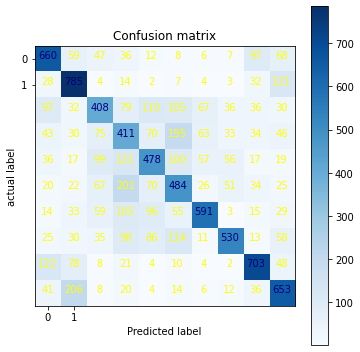

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
# doing the test for evaluation of the model and confusion matrix
p  = model.predict(tst_pics)
p_cm = p.argmax(1)
# Confusion Matrix
confusion_mtx = confusion_matrix(tst_labels,p_cm)
print("confusion matrix=\n",confusion_mtx) 
# plotting the confusion matrix for insights
import itertools
def plotconfusion(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    #threshold
    t = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="navy" if cm[i, j] > t else "yellow")
    plt.tight_layout()
    plt.ylabel('actual label')
    plt.xlabel('Predicted label')
    
plotconfusion(confusion_mtx, [0,1])    

print(classification_report(tst_labels,p_cm))